Установка (Windows):
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
pip install keras-gpu

Добавить в переменные среды ключ "KERAS_BACKEND" со значением "torch"

In [71]:
import keras
from keras import layers

import numpy as np

In [72]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

data_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [73]:
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(len(data_labels), activation="softmax"),
    ]
)

In [74]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 64)        │        640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 64)        │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 128)       │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)         │    147,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_average_pooling2d_2      │ (None, 128)               │          0 │
│ (GlobalAveragePooling2D)        │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 128)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 10)                │      1,290 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 260,298 (1016.79 KB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="acc"),
    ],
)

In [76]:
batch_size = 128
epochs = 10

# Колбэки для модели
callbacks = [
    # Сохранение промежуточного состояния эпохи
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    # Ранняя остановка при достижении уровня потерь до 0.2
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2),
]

model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - acc: 0.5914 - loss: 1.4086 - val_acc: 0.8357 - val_loss: 0.4610
Epoch 2/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - acc: 0.8156 - loss: 0.5168 - val_acc: 0.8479 - val_loss: 0.4052
Epoch 3/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - acc: 0.8529 - loss: 0.4175 - val_acc: 0.8804 - val_loss: 0.3380
Epoch 4/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - acc: 0.8707 - loss: 0.3704 - val_acc: 0.8858 - val_loss: 0.3131
Epoch 5/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - acc: 0.8775 - loss: 0.3485 - val_acc: 0.8943 - val_loss: 0.2869
Epoch 6/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - acc: 0.8877 - loss: 0.3151 - val_acc: 0.8982 - val_loss: 0.2722
Epoch 7/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - acc: 0.8940 - loss: 0.2987 - val_acc: 0.8940 - val_loss: 0.2833
Epoch 8/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - acc: 0.8985 - loss: 0.2855 - val_acc: 0.9062 - val_loss: 0.2647
Epoch 9/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/

In [77]:
score

[0.2593976557254791, 0.9107000231742859]

In [78]:
model.save("final_model.keras")

In [79]:
model = keras.saving.load_model("final_model.keras")

In [80]:
predictions = model.predict(x_test)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[4.1560427e-10, 1.3774812e-09, 4.8007271e-12, ..., 3.9116191e-03,
        1.3604181e-09, 9.9583375e-01],
       [2.3641840e-05, 1.2115124e-08, 9.9949276e-01, ..., 2.1409175e-11,
        3.5709959e-07, 6.9012915e-09],
       [4.4701037e-19, 1.0000000e+00, 1.2027134e-18, ..., 3.0669883e-39,
        1.2916193e-24, 6.8426204e-25],
       ...,
       [6.5339102e-17, 1.9308562e-21, 1.2410792e-21, ..., 3.4223986e-25,
        1.0000000e+00, 5.5422878e-20],
       [1.7838074e-16, 1.0000000e+00, 7.7592182e-15, ..., 1.7988338e-31,
        5.9491320e-22, 1.3085538e-19],
       [4.0075947e-03, 2.1102605e-04, 2.1812419e-04, ..., 4.5191613e-01,
        1.9529874e-03, 7.9643289e-03]], dtype=float32)

In [81]:
import matplotlib.pyplot as plt

Predicted is 'Ankle boot' and original is 'Ankle boot' which is correct
Probability is 0.996


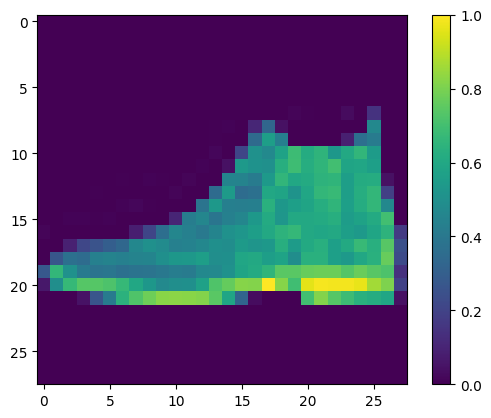

Predicted is 'Pullover' and original is 'Pullover' which is correct
Probability is 0.999


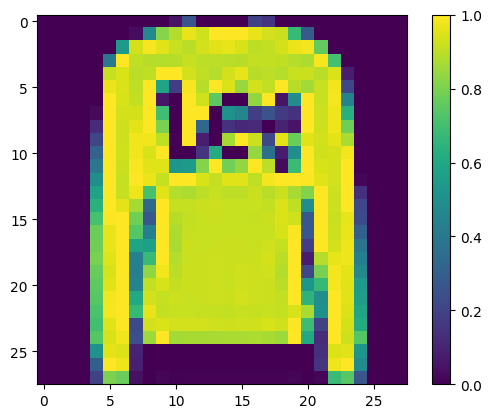

Predicted is 'Trouser' and original is 'Trouser' which is correct
Probability is 1.000


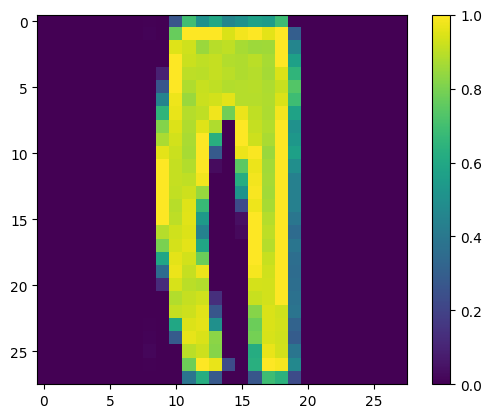

Predicted is 'Trouser' and original is 'Trouser' which is correct
Probability is 1.000


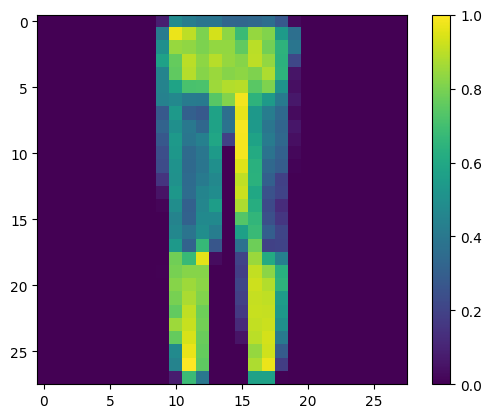

Predicted is 'Shirt' and original is 'Shirt' which is correct
Probability is 0.929


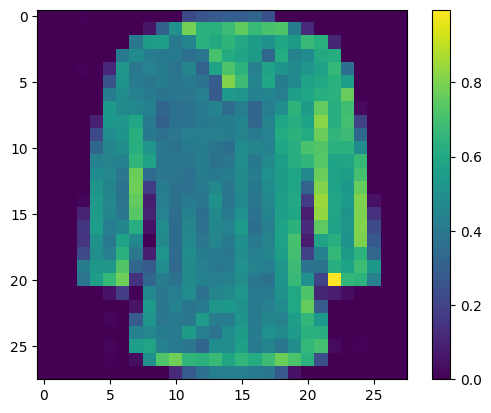

Predicted is 'Trouser' and original is 'Trouser' which is correct
Probability is 1.000


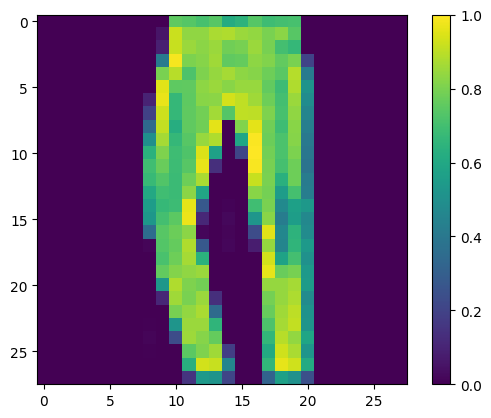

Predicted is 'Coat' and original is 'Coat' which is correct
Probability is 0.992


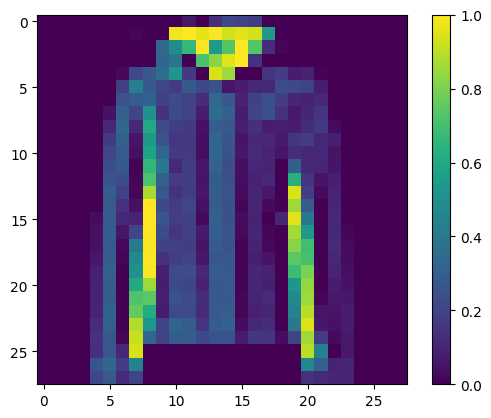

Predicted is 'Shirt' and original is 'Shirt' which is correct
Probability is 0.853


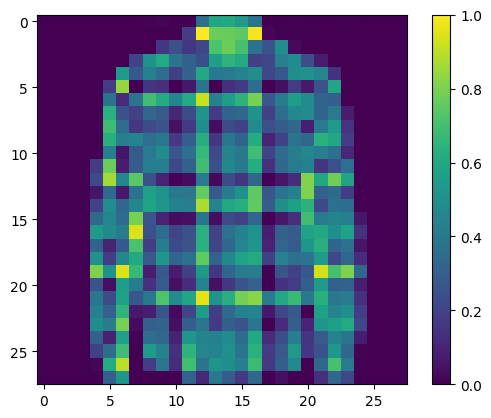

Predicted is 'Sandal' and original is 'Sandal' which is correct
Probability is 1.000


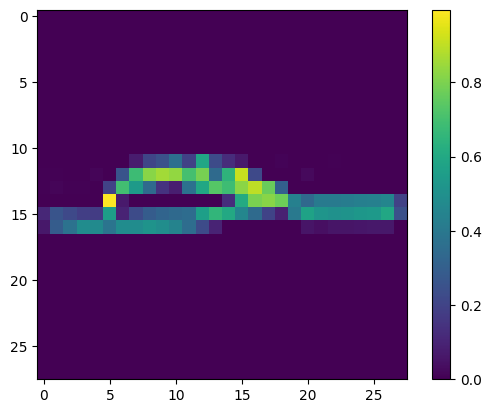

Predicted is 'Sneaker' and original is 'Sneaker' which is correct
Probability is 1.000


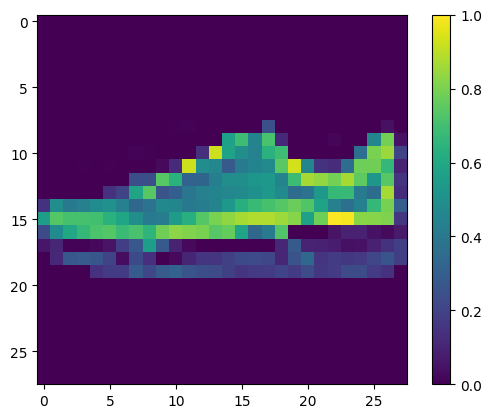

In [82]:
results_to_show = 10

x_test_flatten = x_test / 255


for i in range(results_to_show):
    result = np.argmax(predictions[i])
    estimated = np.max(y_test[i])
    probability = np.max(predictions[i])

    plt.figure()
    plt.imshow(x_test_flatten[i])

    print(
        f"Predicted is '{data_labels[result]}' and original is '{data_labels[estimated]}' which is {'correct' if result == estimated else 'incorrect'}",
    )
    print(f"Probability is {probability:.3f}")

    plt.colorbar()
    plt.grid(False)

    plt.show()